<a href="https://colab.research.google.com/github/navilaufm/ML_LR_rainfall_MGGT/blob/main/Norman_Avila_ML_LR_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd

In [84]:
data = pd.read_csv('https://github.com/navilaufm/ML_LR_rainfall_MGGT/raw/main/metar_data.csv')

In [85]:
data.head()

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,dew_10am,hum_10am,wnd_10am,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,11.0,58.0,360.0,N,5.1,1026.1,22000.0,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,13.0,68.0,360.0,N,7.2,1027.1,22000.0,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,10.0,56.0,360.0,N,9.3,1028.1,22000.0,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,9.0,50.0,360.0,N,7.2,1029.1,22000.0,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,10.0,59.0,360.0,N,5.1,1027.1,22000.0,0,0,0


In [86]:
## create a date field to get month, day, year
data['day_date'] = pd.to_datetime(data['day_date'])
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,dew_10am,hum_10am,wnd_10am,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,11.0,58.0,360.0,N,5.1,1026.1,22000.0,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,13.0,68.0,360.0,N,7.2,1027.1,22000.0,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,10.0,56.0,360.0,N,9.3,1028.1,22000.0,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,9.0,50.0,360.0,N,7.2,1029.1,22000.0,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,10.0,59.0,360.0,N,5.1,1027.1,22000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,...,11.0,69.0,40.0,N,6.2,1027.0,99999.0,0,0,0
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,...,10.0,63.0,20.0,N,5.1,1028.0,99999.0,0,0,1
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,...,11.0,69.0,360.0,N,4.1,1028.0,99999.0,0,0,0
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,...,13.0,65.0,-99.0,CALM,2.1,1025.0,99999.0,0,0,0


In [87]:
data['year'] = data['day_date'].dt.year
data['month'] = data['day_date'].dt.month
data['day'] = data['day_date'].dt.day
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,...,wdd_10am,spd_10am,alt_10am,cig_10am,pcp_hrs,pcp,pcp_yesterday,year,month,day
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,...,N,5.1,1026.1,22000.0,0,0,0,2001,1,1
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,...,N,7.2,1027.1,22000.0,0,0,0,2001,1,2
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,...,N,9.3,1028.1,22000.0,0,0,0,2001,1,3
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,...,N,7.2,1029.1,22000.0,0,0,0,2001,1,4
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,...,N,5.1,1027.1,22000.0,0,0,0,2001,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,...,N,6.2,1027.0,99999.0,0,0,0,2020,12,27
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,...,N,5.1,1028.0,99999.0,0,0,1,2020,12,28
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,...,N,4.1,1028.0,99999.0,0,0,0,2020,12,29
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,...,CALM,2.1,1025.0,99999.0,0,0,0,2020,12,30


In [88]:
# create dummy variables of wind direction feactures features
data = pd.get_dummies(data, columns=['wdd_9am'])
data = pd.get_dummies(data, columns=['wdd_10am'])
data.T

,0,1,2,3,4,5,6,7,8,9,...,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779
dia,2001-01-01 00:00:00.000,2001-01-02 00:00:00.000,2001-01-03 00:00:00.000,2001-01-04 00:00:00.000,2001-01-05 00:00:00.000,2001-01-06 00:00:00.000,2001-01-07 00:00:00.000,2001-01-08 00:00:00.000,2001-01-09 00:00:00.000,2001-01-10 00:00:00.000,...,2020-12-22 00:00:00.000,2020-12-23 00:00:00.000,2020-12-24 00:00:00.000,2020-12-25 00:00:00.000,2020-12-26 00:00:00.000,2020-12-27 00:00:00.000,2020-12-28 00:00:00.000,2020-12-29 00:00:00.000,2020-12-30 00:00:00.000,2020-12-31 00:00:00.000
day_date,2001-01-01 00:00:00,2001-01-02 00:00:00,2001-01-03 00:00:00,2001-01-04 00:00:00,2001-01-05 00:00:00,2001-01-06 00:00:00,2001-01-07 00:00:00,2001-01-08 00:00:00,2001-01-09 00:00:00,2001-01-10 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
tmp_9am,17.0,18.2,18.0,15.2,15.0,14.8,16.8,17.8,16.0,16.6,...,18.0,19.0,19.0,19.0,14.0,14.0,14.0,16.0,17.0,19.0
dew_9am,10.0,13.2,10.5,9.2,10.0,11.2,11.0,13.2,11.0,9.3,...,14.0,13.0,14.0,11.0,9.0,11.0,10.0,10.0,13.0,15.0
hum_9am,59,73,58,61,67,76,65,74,69,56,...,78,68,74,58,64,79,71,63,76,79
wnd_9am,360,20,360,360,360,30,180,360,360,360,...,360,360,180,30,360,40,30,360,360,180
spd_9am,6.2,9.3,11.3,12.9,9.3,5.1,2.1,2.1,9.3,7.2,...,7.2,7.2,2.1,14.4,8.2,6.2,7.2,8.2,2.1,3.1
alt_9am,1026.1,1027.1,1028.1,1029.1,1027.1,1025.1,1023.0,1024.0,1026.1,1027.1,...,1028.0,1028.0,1027.0,1028.0,1028.0,1027.0,1028.0,1028.0,1025.0,1024.0
cig_9am,6000,22000,22000,22000,22000,22000,22000,22000,22000,22000,...,99999,99999,99999,99999,99999,366,549,99999,99999,2438
tmp_10am,19.0,19.0,18.0,18.0,17.0,17.0,19.0,20.0,18.0,18.0,...,20.0,21.0,22.0,19.0,16.0,16.0,16.0,16.0,20.0,19.0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dia            6780 non-null   object        
 1   day_date       6780 non-null   datetime64[ns]
 2   tmp_9am        6780 non-null   float64       
 3   dew_9am        6780 non-null   float64       
 4   hum_9am        6780 non-null   int64         
 5   wnd_9am        6780 non-null   int64         
 6   spd_9am        6779 non-null   float64       
 7   alt_9am        6752 non-null   float64       
 8   cig_9am        6780 non-null   int64         
 9   tmp_10am       6549 non-null   float64       
 10  dew_10am       6545 non-null   float64       
 11  hum_10am       6541 non-null   float64       
 12  wnd_10am       6606 non-null   float64       
 13  spd_10am       6379 non-null   float64       
 14  alt_10am       6535 non-null   float64       
 15  cig_10am       6606 n

In [90]:
data['cig_9am'].unique() ##todo check if this values can be dummied.

array([ 6000, 22000,   420,   510,   180,   360,  2100,   480,   390,
         450,   600,  4500,  2400,   540, 10500,  2700,  3000,   900,
         120,   240,   750,   660, 99999,   300,  3600,   720,  1800,
          90,    60,  6096,   427,   396,   305,   488,  2438,  3048,
         457,   549,  2743,   610,   518,   366,  2134,  1829,   671,
          61,   183,  1981,   122,  3658,   244])

In [91]:
#data = pd.get_dummies(data, columns=['cig_9am'])
#data

## no relevant variable and correlation after dummies. so reverted

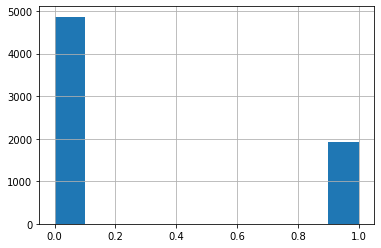

In [92]:
data["pcp"].hist() ##this is the value wanted to predict if will rain in afternoon

In [93]:
data.columns

Index(['dia', 'day_date', 'tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
       'spd_9am', 'alt_9am', 'cig_9am', 'tmp_10am', 'dew_10am', 'hum_10am',
       'wnd_10am', 'spd_10am', 'alt_10am', 'cig_10am', 'pcp_hrs', 'pcp',
       'pcp_yesterday', 'year', 'month', 'day', 'wdd_9am_CALM', 'wdd_9am_E',
       'wdd_9am_N', 'wdd_9am_S', 'wdd_9am_W', 'wdd_10am_CALM', 'wdd_10am_E',
       'wdd_10am_N', 'wdd_10am_S', 'wdd_10am_W'],
      dtype='object')

In [94]:
import seaborn as sns

In [95]:
##sns.pairplot(data[
##        ['tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
##       'spd_9am', 'alt_9am', 'cig_9am', 'pcp','pcp_yesterday']        
##])

In [96]:
data.pcp.isnull().sum() ##no null values

0

In [97]:

data=data.drop(data[data.hum_10am.isnull()].index)  ##cleanup
data[data.hum_10am.isnull()==False]

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,6.2,1026.1,6000,19.0,...,0,0,1,0,0,0,0,1,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,9.3,1027.1,22000,19.0,...,0,0,1,0,0,0,0,1,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,11.3,1028.1,22000,18.0,...,0,0,1,0,0,0,0,1,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,12.9,1029.1,22000,18.0,...,0,0,1,0,0,0,0,1,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,9.3,1027.1,22000,17.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,6.2,1027.0,366,16.0,...,0,0,1,0,0,0,0,1,0,0
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,7.2,1028.0,549,16.0,...,0,0,1,0,0,0,0,1,0,0
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,8.2,1028.0,99999,16.0,...,0,0,1,0,0,0,0,1,0,0
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,2.1,1025.0,99999,20.0,...,0,0,1,0,0,1,0,0,0,0


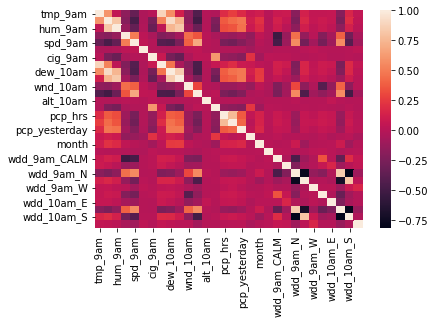

In [98]:
sns.heatmap(data.corr())

In [99]:
data_corr = data.corr()
data_corr

,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,dew_10am,hum_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W
tmp_9am,1.000000,0.601700,0.046548,-0.170693,-0.338320,-0.036989,0.002057,0.890512,0.568597,0.124891,...,0.081581,0.087180,-0.190906,0.131267,0.049367,0.052019,0.059809,-0.203810,0.161013,0.042670
dew_9am,0.601700,1.000000,0.820018,-0.203861,-0.467165,-0.036849,-0.260478,0.524437,0.921520,0.735871,...,0.130304,0.061301,-0.241975,0.166334,0.056236,0.088627,0.059542,-0.243056,0.194729,0.038679
hum_9am,0.046548,0.820018,1.000000,-0.133234,-0.343769,-0.022998,-0.322686,0.030131,0.745521,0.833862,...,0.103965,0.012844,-0.169272,0.119246,0.032940,0.074819,0.029616,-0.161380,0.133121,0.017764
wnd_9am,-0.170693,-0.203861,-0.133234,1.000000,0.496349,0.024660,-0.052663,-0.221976,-0.182531,-0.077813,...,-0.530204,-0.128824,0.450096,-0.138834,0.008856,-0.208915,-0.072184,0.395875,-0.285877,-0.053584
spd_9am,-0.338320,-0.467165,-0.343769,0.496349,1.000000,0.040384,-0.010229,-0.411495,-0.432107,-0.250492,...,-0.480434,-0.108447,0.554161,-0.281604,-0.081428,-0.272427,-0.104200,0.562244,-0.412072,-0.088092
alt_9am,-0.036989,-0.036849,-0.022998,0.024660,0.040384,1.000000,-0.014898,-0.031361,-0.036949,-0.026385,...,-0.004425,-0.007380,-0.009126,0.009859,0.029751,0.002128,-0.008343,-0.004850,0.004152,0.029767
cig_9am,0.002057,-0.260478,-0.322686,-0.052663,-0.010229,-0.014898,1.000000,0.069849,-0.268729,-0.342957,...,0.013621,0.017303,-0.001713,-0.012462,-0.001168,0.015315,-0.009547,-0.009715,0.001281,-0.009224
tmp_10am,0.890512,0.524437,0.030131,-0.221976,-0.411495,-0.031361,0.069849,1.000000,0.467100,-0.056788,...,0.123319,0.095120,-0.229454,0.149084,0.036913,0.093864,0.077327,-0.250801,0.176855,0.048758
dew_10am,0.568597,0.921520,0.745521,-0.182531,-0.432107,-0.036949,-0.268729,0.467100,1.000000,0.850536,...,0.114662,0.048414,-0.213782,0.150719,0.042358,0.087636,0.045823,-0.219010,0.172701,0.029818
hum_10am,0.124891,0.735871,0.833862,-0.077813,-0.250492,-0.026385,-0.342957,-0.056788,0.850536,1.000000,...,0.055943,-0.000576,-0.113695,0.091498,0.025925,0.045529,0.005487,-0.106509,0.098594,0.006789


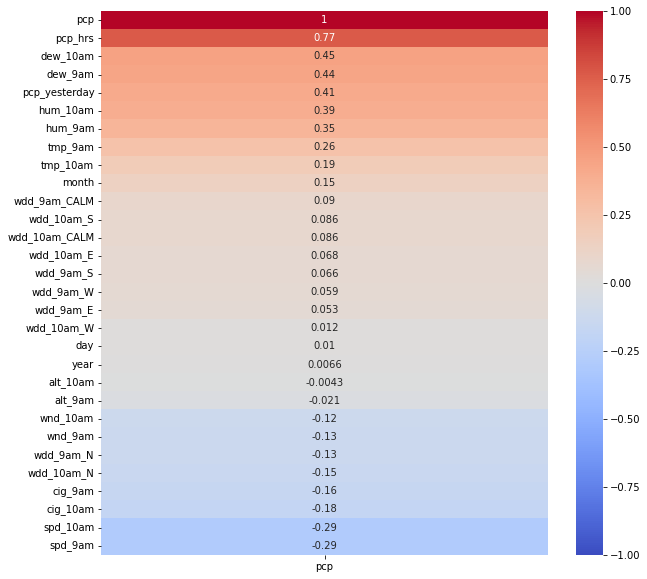

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data_corr[['pcp']].sort_values(by=['pcp'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [101]:
data_corr[['pcp']].sort_values(by=['pcp'],ascending=False)

,pcp
pcp,1.000000
pcp_hrs,0.768915
dew_10am,0.453527
dew_9am,0.438406
pcp_yesterday,0.411943
hum_10am,0.390984
hum_9am,0.348075
tmp_9am,0.262329
tmp_10am,0.190702
month,0.146722


In [102]:
import numpy as np

In [103]:
#removing pcp fiend and storing in variable y
y = data.pop('pcp')
y

0       0
1       0
2       0
3       0
4       0
       ..
6775    0
6776    0
6777    0
6778    0
6779    1
Name: pcp, Length: 6541, dtype: int64

In [104]:
data_corr[['pcp']].sort_values(by=['pcp'],ascending=False).index


Index(['pcp', 'pcp_hrs', 'dew_10am', 'dew_9am', 'pcp_yesterday', 'hum_10am',
       'hum_9am', 'tmp_9am', 'tmp_10am', 'month', 'wdd_9am_CALM', 'wdd_10am_S',
       'wdd_10am_CALM', 'wdd_10am_E', 'wdd_9am_S', 'wdd_9am_W', 'wdd_9am_E',
       'wdd_10am_W', 'day', 'year', 'alt_10am', 'alt_9am', 'wnd_10am',
       'wnd_9am', 'wdd_9am_N', 'wdd_10am_N', 'cig_9am', 'cig_10am', 'spd_10am',
       'spd_9am'],
      dtype='object')

In [105]:
X = data[['tmp_9am','dew_9am', 'tmp_10am','dew_10am',
         'month', 'wdd_9am_CALM','pcp_yesterday']] ##features with most correlation
X

,tmp_9am,dew_9am,tmp_10am,dew_10am,month,wdd_9am_CALM,pcp_yesterday
0,17.0,10.0,19.0,11.0,1,0,0
1,18.2,13.2,19.0,13.0,1,0,0
2,18.0,10.5,18.0,10.0,1,0,0
3,15.2,9.2,18.0,9.0,1,0,0
4,15.0,10.0,17.0,10.0,1,0,0
...,...,...,...,...,...,...,...
6775,14.0,11.0,16.0,11.0,12,0,0
6776,14.0,10.0,16.0,10.0,12,0,1
6777,16.0,10.0,16.0,11.0,12,0,0
6778,17.0,13.0,20.0,13.0,12,0,0


In [106]:
#ML Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [107]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,tmp_9am,dew_9am,tmp_10am,dew_10am,month,wdd_9am_CALM,pcp_yesterday
5550,21.0,17.0,22.0,17.0,6,0,1
3105,22.0,15.0,23.0,15.0,6,0,0
488,20.0,14.0,22.0,16.0,8,0,1
5834,21.0,15.0,24.0,13.0,4,1,0
6083,19.0,13.0,22.0,13.0,12,1,0
...,...,...,...,...,...,...,...
2893,20.0,12.0,22.0,12.0,11,0,0
5629,21.0,17.0,22.0,17.0,9,0,1
5785,16.0,12.0,19.0,11.0,2,0,0
1614,18.0,12.0,21.0,10.0,2,0,0


In [108]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0.4846762 , 0.15212764, 0.51346059, ..., 0.66878861, 0.01841524,
       0.30157263])

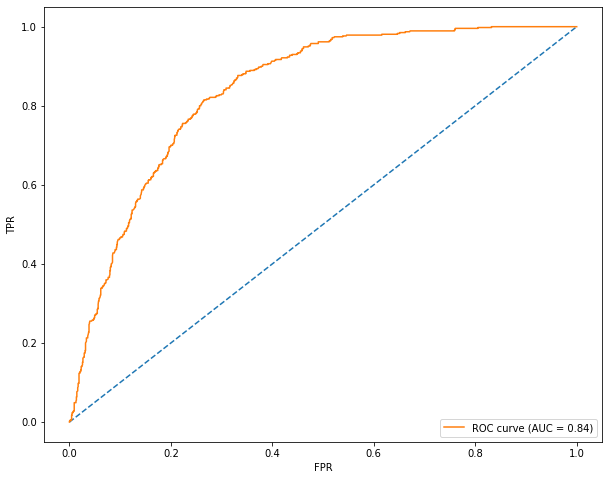

In [109]:
## evaluating Model
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

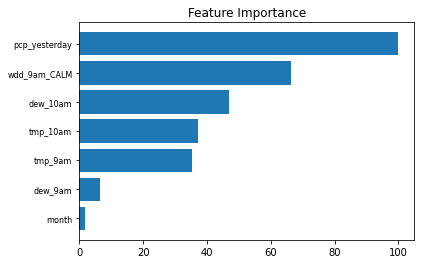

In [110]:
## feature importance

## TOP Correlations. - see above
#-------------------------------#
#dew_9am	0.436143
#pcp_yesterday	0.413329
#hum_9am	0.347378
#tmp_9am	0.260427
#month	0.147885

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

In [111]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
results

In [120]:
##prediction testing

## selection: 'tmp_9am', 'dew_9am', 'hum_9am', 'pcp_yesterday', 'month','wdd_9am_CALM'

##with data of 10am also combined with 10am rain
## 'tmp_9am','dew_9am', 'tmp_10am','dew_10am', 'month', 'wdd_9am_CALM','pcp_yesterday'
prediction = results.get_prediction([22,13,24,12,5,0,0])
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.006902,0.010817,-0.014303,0.028106,-0.765447,0.77925


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f002bb410>]],
      dtype=object)

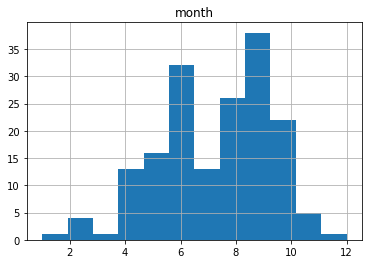

In [115]:
data[(data['wdd_9am_CALM']==1) & (data['pcp_hrs']>0)].hist('month',bins=12) ##when was wind calm and rained

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f001da4d0>]],
      dtype=object)

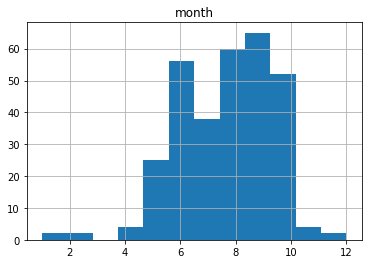

In [116]:
data[(data['pcp_hrs']>5)].hist('month',bins=12) ##rainy afternoon / night

In [117]:
data[data['day_date']>='2022-05-01']

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,tmp_10am,...,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W,wdd_10am_CALM,wdd_10am_E,wdd_10am_N,wdd_10am_S,wdd_10am_W
